<a href="https://colab.research.google.com/github/alejandr21/demo/blob/main/Credit_default_prediction_with_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries.

We start by importing Pandas to work with tabular data, numpy for high speed calculations, matplotlib and seaborn for data visualization.

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset and data pre-processing.

In [ ]:
# Load dataset
df_credit = pd.read_csv('credit_default.csv')
print(df_credit.info())
print('Shape of dataframe:', df_credit.shape)
df_credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  int64  
 12  BILL_AMT2                   30000 non-null  int64  
 13  BILL_AMT3                   300

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,BILL_AVG,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AVG,default payment next month
0,10000,1,2,2,22,0,0,0,0,0,...,4451,3793.500000,1500,2927,1000,300,1000,500,1204.500000,0
1,10000,1,2,1,56,2,2,2,0,0,...,4326,3808.666667,2300,0,150,200,200,160,501.666667,1
2,10000,1,3,2,23,0,0,0,0,0,...,9411,8689.333333,1134,1298,478,847,0,175,655.333333,0
3,10000,1,2,2,27,0,0,2,0,0,...,10182,9474.666667,3507,0,500,370,393,700,911.666667,1
4,10000,1,2,2,24,-1,2,2,2,0,...,2132,2458.666667,0,1500,0,0,150,0,275.000000,0


# Dropping unneccessary columns

Now we will proceed to drop unnecessary columns, to handle the ones that really matter to us, to determine the people which people is more likely to pay their loans according to their age, education, loan amount and marital status.

In [ ]:
# Drop 'PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6' columns
df_credit = df_credit.drop(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6',], axis=1)
df_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,BILL_AVG,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AVG,default payment next month
0,10000,1,2,2,22,1877,3184,6003,3576,3670,4451,3793.500000,1500,2927,1000,300,1000,500,1204.500000,0
1,10000,1,2,1,56,2097,4193,3978,4062,4196,4326,3808.666667,2300,0,150,200,200,160,501.666667,1
2,10000,1,3,2,23,6974,7838,9002,9182,9729,9411,8689.333333,1134,1298,478,847,0,175,655.333333,0
3,10000,1,2,2,27,7015,10227,9560,9901,9963,10182,9474.666667,3507,0,500,370,393,700,911.666667,1
4,10000,1,2,2,24,2887,1923,2989,2813,2008,2132,2458.666667,0,1500,0,0,150,0,275.000000,0


Now we will drop the BILL_ATM1 to BILL_ATM6

In [ ]:
# Drop 'BILL_ATM1, BILL_ATM2, ABILL_ATM3, BILL_ATM4, BILL_ATM5, BILL_ATM6' columns
df_credit = df_credit.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1)
df_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AVG,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AVG,default payment next month
0,10000,1,2,2,22,3793.500000,1500,2927,1000,300,1000,500,1204.500000,0
1,10000,1,2,1,56,3808.666667,2300,0,150,200,200,160,501.666667,1
2,10000,1,3,2,23,8689.333333,1134,1298,478,847,0,175,655.333333,0
3,10000,1,2,2,27,9474.666667,3507,0,500,370,393,700,911.666667,1
4,10000,1,2,2,24,2458.666667,0,1500,0,0,150,0,275.000000,0


In [ ]:
# Drop 'PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6' columns
df_credit = df_credit.drop(['PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6'], axis=1)
df_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AVG,PAY_AVG,default payment next month
0,10000,1,2,2,22,3793.500000,1204.500000,0
1,10000,1,2,1,56,3808.666667,501.666667,1
2,10000,1,3,2,23,8689.333333,655.333333,0
3,10000,1,2,2,27,9474.666667,911.666667,1
4,10000,1,2,2,24,2458.666667,275.000000,0


We now change the replace the name of the last colum for easy manipulation of the variable, to uppercase and single name "Payment".

In [ ]:
# Change name of last column to PAYMENT.
df_credit.rename(columns = {'default payment next month':'PAYMENT'}, inplace = True)
print(df_credit.info())
print('Shape of dataframe:', df_credit.shape)
df_credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   BILL_AVG   30000 non-null  float64
 6   PAY_AVG    30000 non-null  float64
 7   PAYMENT    30000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.8 MB
None
Shape of dataframe: (30000, 8)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AVG,PAY_AVG,PAYMENT
0,10000,1,2,2,22,3793.500000,1204.500000,0
1,10000,1,2,1,56,3808.666667,501.666667,1
2,10000,1,3,2,23,8689.333333,655.333333,0
3,10000,1,2,2,27,9474.666667,911.666667,1
4,10000,1,2,2,24,2458.666667,275.000000,0


We proceed now to plot the data distribution for some of our features, using the following comand.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


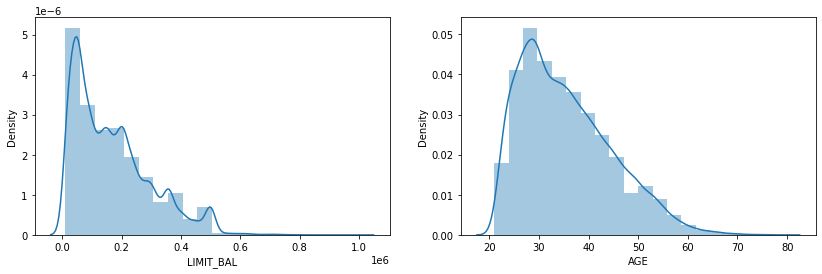

In [ ]:
#Distribution of Data.
plt.figure(figsize=(14,4))
plt.subplot(1,2,1) 
A1 = sns.distplot(df_credit.LIMIT_BAL, bins=20)
plt.subplot(1,2,2) 
B1 = sns.distplot(df_credit.AGE, bins=20)

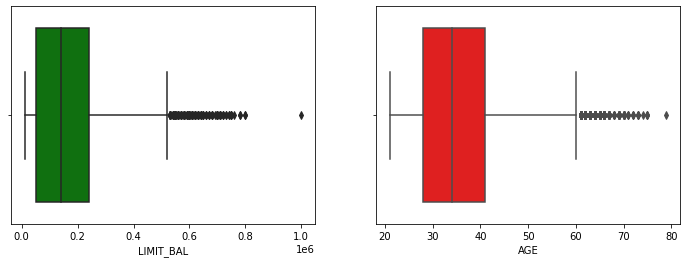

In [ ]:
#We proceed to perform some box plot for some features.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
g2 = sns.boxplot(x=df_credit["LIMIT_BAL"], color= "green")
plt.subplot(1,2,2)
g3 = sns.boxplot(x=df_credit["AGE"], color= "red")


# Detect missing values in our data.

We proceed to verify our data for any missing values with the following comand.

In [ ]:
df_credit.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
BILL_AVG     0
PAY_AVG      0
PAYMENT      0
dtype: int64

# Bar plot for out target feature Payment.

We proceed with ploting the number of people who paid their loans as supposed, vs the ones who didn't. As we can see very few people did pay their loans.

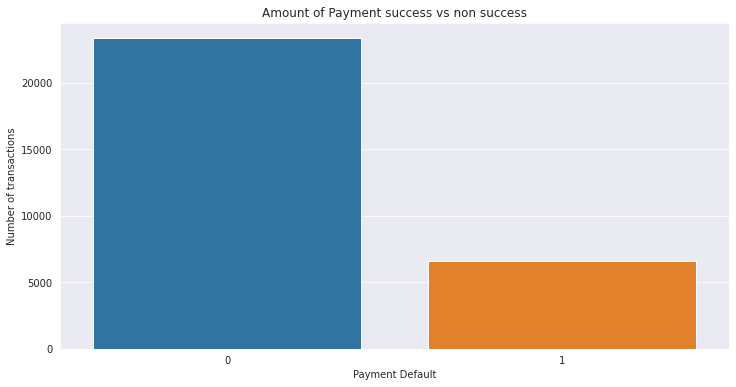

In [ ]:
Payment_Success = df_credit.PAYMENT.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x= Payment_Success.index, y= Payment_Success.values)
plt.title("Amount of Payment success vs non success")
plt.xlabel("Payment Default")
plt.ylabel("Number of transactions")
plt.show()

Now we want to know the distributions of loans approved and their amounts, for this we first want to know the min and max values for the loans and create ranges for this data (the ranges are only for visualization purposes).

In [ ]:
print("The Smallest Element in this List is : ", min(df_credit.LIMIT_BAL.values))
print("The Largest Element in this List is : ", max(df_credit.LIMIT_BAL.values))

The Smallest Element in this List is :  10000
The Largest Element in this List is :  1000000


Below is the number of loans approved, delimited by their amounts range. We can notice that there are around 20000 credits between 10000 and 200000 loans, around 7500 loans between 200001 and 400000, about 2000 credits between 400001 and 600000, and after 600000, we can appreciate that is really low number of credits in comparisson with the rest, perhaps because they are big amount of money, since these credit loans are very low number they can't be appreciated very well, so I decided to create another plot only for them. We can see that there are about 78 loans between 600001 and 800000 and above that only 3 loans were approved.

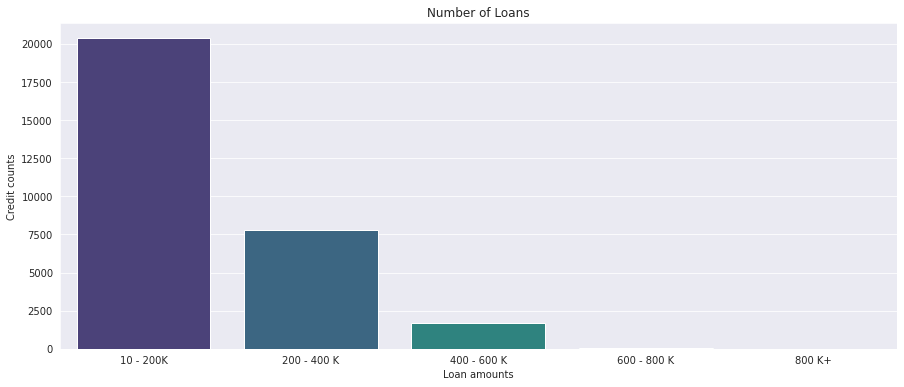

In [ ]:
loans_10K_200K = df_credit.LIMIT_BAL[(df_credit.LIMIT_BAL <= 200000) & (df_credit.LIMIT_BAL >= 10000)]
loans_200K_400K = df_credit.LIMIT_BAL[(df_credit.LIMIT_BAL <= 400000) & (df_credit.LIMIT_BAL >= 200001)]
loans_400K_600K = df_credit.LIMIT_BAL[(df_credit.LIMIT_BAL <= 600000) & (df_credit.LIMIT_BAL >= 400001)]
loans_600K_800K = df_credit.LIMIT_BAL[(df_credit.LIMIT_BAL <= 800000) & (df_credit.LIMIT_BAL >= 600001)]
loans_800K_1M = df_credit.LIMIT_BAL[df_credit.LIMIT_BAL >= 800001]

x = ["10 - 200K","200 - 400 K","400 - 600 K","600 - 800 K","800 K+"]
y = [len(loans_10K_200K.values),len(loans_200K_400K.values),len(loans_400K_600K.values),len(loans_600K_800K.values),len(loans_800K_1M.values)]

Loans_approved = df_credit.LIMIT_BAL.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x= x, y= y, palette = "viridis")
plt.title("Number of Loans")
plt.xlabel("Loan amounts")
plt.ylabel("Credit counts")
plt.show()

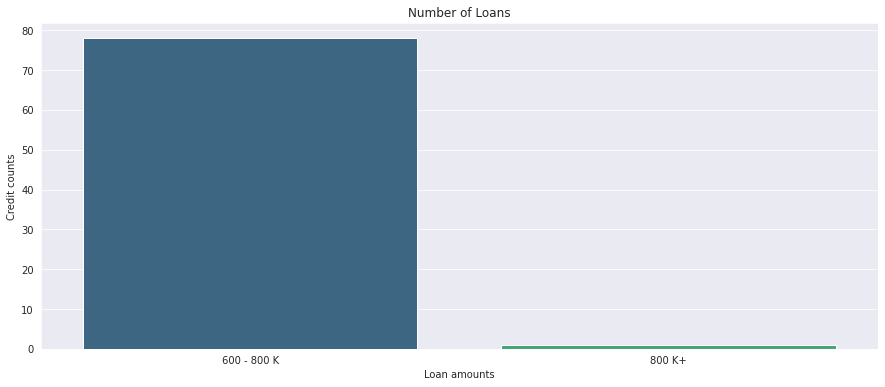

In [ ]:
loans_600K_800K = df_credit.LIMIT_BAL[(df_credit.LIMIT_BAL <= 800000) & (df_credit.LIMIT_BAL >= 600001)]
loans_800K_1M = df_credit.LIMIT_BAL[df_credit.LIMIT_BAL >= 800001]

x = ["600 - 800 K","800 K+"]
y = [len(loans_600K_800K.values),len(loans_800K_1M.values)]

Loans_approved = df_credit.LIMIT_BAL.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x= x, y= y, palette = "viridis")
plt.title("Number of Loans")
plt.xlabel("Loan amounts")
plt.ylabel("Credit counts")
plt.show()

Another interesting plot would be the age of the borrowers, which will be plotted below in a similar way, we can notice that people at lower age tend to request more loans, and as the years pass by, they tend to borrow less.

In [ ]:
print("The Smallest Element in this List is : ", min(df_credit.AGE.values))
print("The Largest Element in this List is : ", max(df_credit.AGE.values))

The Smallest Element in this List is :  21
The Largest Element in this List is :  79


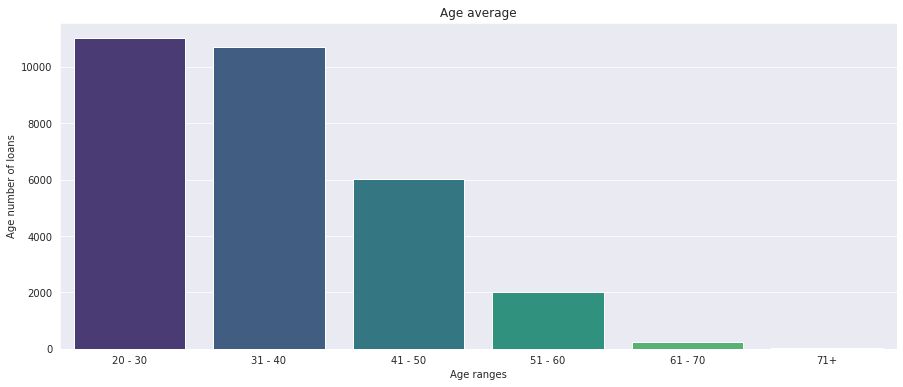

In [ ]:
age_20_30 = df_credit.AGE[(df_credit.AGE <= 30) & (df_credit.AGE >= 20)]
age_31_40 = df_credit.AGE[(df_credit.AGE <= 40) & (df_credit.AGE >= 31)]
age_41_50 = df_credit.AGE[(df_credit.AGE <= 50) & (df_credit.AGE >= 41)]
age_51_60 = df_credit.AGE[(df_credit.AGE <= 60) & (df_credit.AGE >= 51)]
age_61_70 = df_credit.AGE[(df_credit.AGE <= 70) & (df_credit.AGE >= 61)]
age_71 = df_credit.AGE[df_credit.AGE >= 71]

x = ["20 - 30","31 - 40","41 - 50","51 - 60","61 - 70","71+"]
y = [len(age_20_30.values),len(age_31_40.values),len(age_41_50.values),len(age_51_60.values),len(age_61_70.values), len(age_71.values)]

Age_range = df_credit.AGE.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x= x, y= y, palette = "viridis")
plt.title("Age average")
plt.xlabel("Age ranges")
plt.ylabel("Age number of loans")
plt.show()

# Normalizing the data.

Now we proceed to normalize our data, to avoid big values to avoid outliers in our data by using StandardScaler() command. Below we begin by choosing the data that we want to scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_credit_ready = df_credit.copy()

scaler = StandardScaler()
num_cols = ['LIMIT_BAL', 'AGE', 'BILL_AVG', 'PAY_AVG']
df_credit_ready[num_cols] = scaler.fit_transform(df_credit_ready[num_cols])

df_credit_ready.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AVG,PAY_AVG,PAYMENT
0,-1.213794,1,2,2,-1.462993,-0.651022,-0.401541,0
1,-1.213794,1,2,1,2.225543,-0.650782,-0.470869,1
2,-1.213794,1,3,2,-1.354506,-0.573630,-0.455711,0
3,-1.213794,1,2,2,-0.920561,-0.561215,-0.430426,1
4,-1.213794,1,2,2,-1.246020,-0.672123,-0.493228,0


# Heat map of the data.

Now we proceed to plot the heat map for the dataset.

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

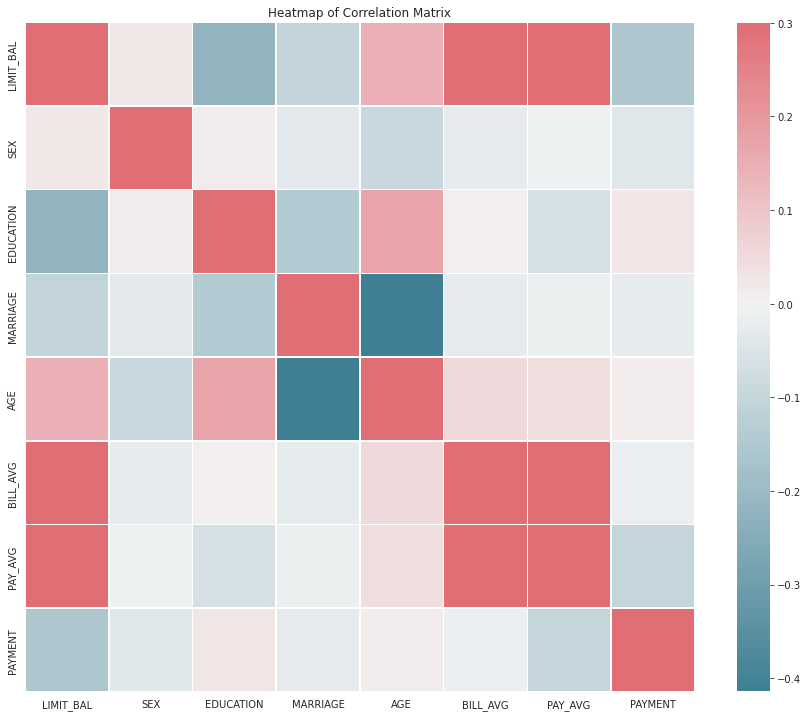

In [ ]:
corr = df_credit.corr()
# Heatmap
plt.figure(figsize = (15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

# Neural Network Section.

In [ ]:
from keras.layers import Dense, Activation
from keras.models import Sequential

In [ ]:
# Neural network modeling.
y = df_credit ['PAYMENT']

x = df_credit [['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AVG', 'PAY_AVG']]

In [ ]:
NNmodel = Sequential()

NNmodel.add( Dense(20, activation= 'relu', input_dim = 7))
NNmodel.add( Dense(20, activation= 'relu'))
NNmodel.add( Dense(20, activation= 'relu'))
NNmodel.add( Dense(1))

NNmodel.compile( loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Now we proceed to plot our artificial neural network.

In [ ]:
print(NNmodel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________
None


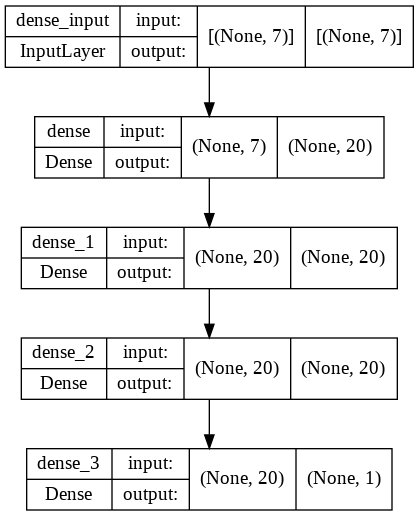

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(NNmodel, to_file='NN_plot.png', show_shapes=True, show_layer_names=True)

Then we split the data for training and testing, using the following comand.

In [ ]:
x_train = x[0:24000]
x_test = x[24000:30000]

y_train = y[0:24000]
y_test = y[24000:30000]

Then we train the model with the following command.

In [ ]:
history = NNmodel.fit(x_train,y_train,epochs=5, batch_size= 128)

Epoch 1/5
188/188 [==============================] - 0s 3ms/step - loss: 1.0870 - accuracy: 0.6317
Epoch 2/5
188/188 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.6139
Epoch 3/5
188/188 [==============================] - 1s 3ms/step - loss: 17.1800 - accuracy: 0.5534
Epoch 4/5
188/188 [==============================] - 0s 2ms/step - loss: 1.4805 - accuracy: 0.5922
Epoch 5/5
188/188 [==============================] - 0s 2ms/step - loss: 5.0381 - accuracy: 0.6122


Now we plot the accuracy of the model.

dict_keys(['loss', 'accuracy'])


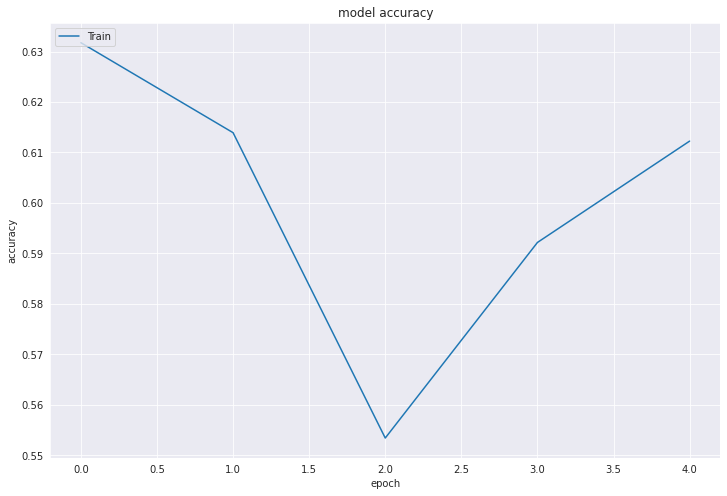

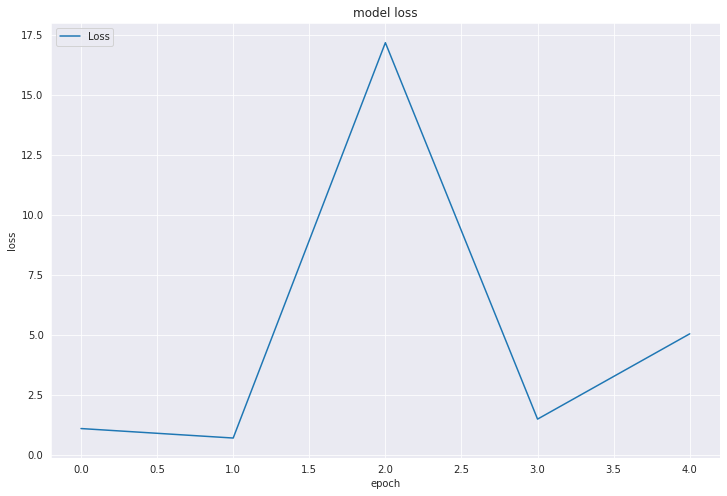

In [ ]:
fig = plt.figure(figsize=(12, 8))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(12, 8))

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss'], loc='upper left')
plt.show()

In [ ]:
# 'LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AVG', 'PAY_AVG'.
prediction = NNmodel.predict([[350000,1,2,1,30,2000,1000]])
if prediction >= 0.35: 
  print ("High probability of default")
else: print ("Low probability of default")
print ('The prediction is:', prediction)

High probability of default
The prediction is: [[0.43290725]]


# Extracting dependent variable.

Now we will extract the PAYMENT column which is our dependent variable.

In [ ]:
# Extract the deposte_cat column (the dependent variable)
corr_payment = pd.DataFrame(corr['PAYMENT'].drop('PAYMENT'))
corr_payment.sort_values(by = 'PAYMENT', ascending = False)

,PAYMENT
EDUCATION,0.028006
AGE,0.013890
BILL_AVG,-0.012691
MARRIAGE,-0.024339
SEX,-0.039961
PAY_AVG,-0.102354
LIMIT_BAL,-0.153520


# Splitting the data for testing and training.

In [ ]:
# Select Features
feature = df_credit.drop('PAYMENT', axis=1)

# Select Target
target = df_credit['PAYMENT']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (24000, 7)
Shape of testing feature: (6000, 7)
Shape of training label: (24000,)
Shape of training label: (6000,)


# Modeling Section

Now that we devided our data and got the correlation between our target feature and the cathegorical ones, we proceed to create our algorithm, in this case we want a decision tree to predict the probability a person pay their loan, based on the parameters previously described.

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    disp = metrics.ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

    print(metrics.classification_report(y_test, y_pred))

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

Now we build the model

In [ ]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

Now we proceed to evaluate our model for accuracy and performance.

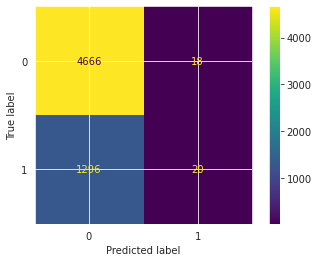

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4684
           1       0.53      0.02      0.03      1316

    accuracy                           0.78      6000
   macro avg       0.65      0.51      0.45      6000
weighted avg       0.73      0.78      0.69      6000

Accuracy: 0.781
Precision: 0.5263157894736842
Recall: 0.015197568389057751
F1 Score: 0.029542097488921715
Cohens Kappa Score: 0.017445697798001647
Area Under Curve: 0.6527721448428201


In [ ]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])

We proceed to display our decision tree algorithm so we can appreciate what we just build.

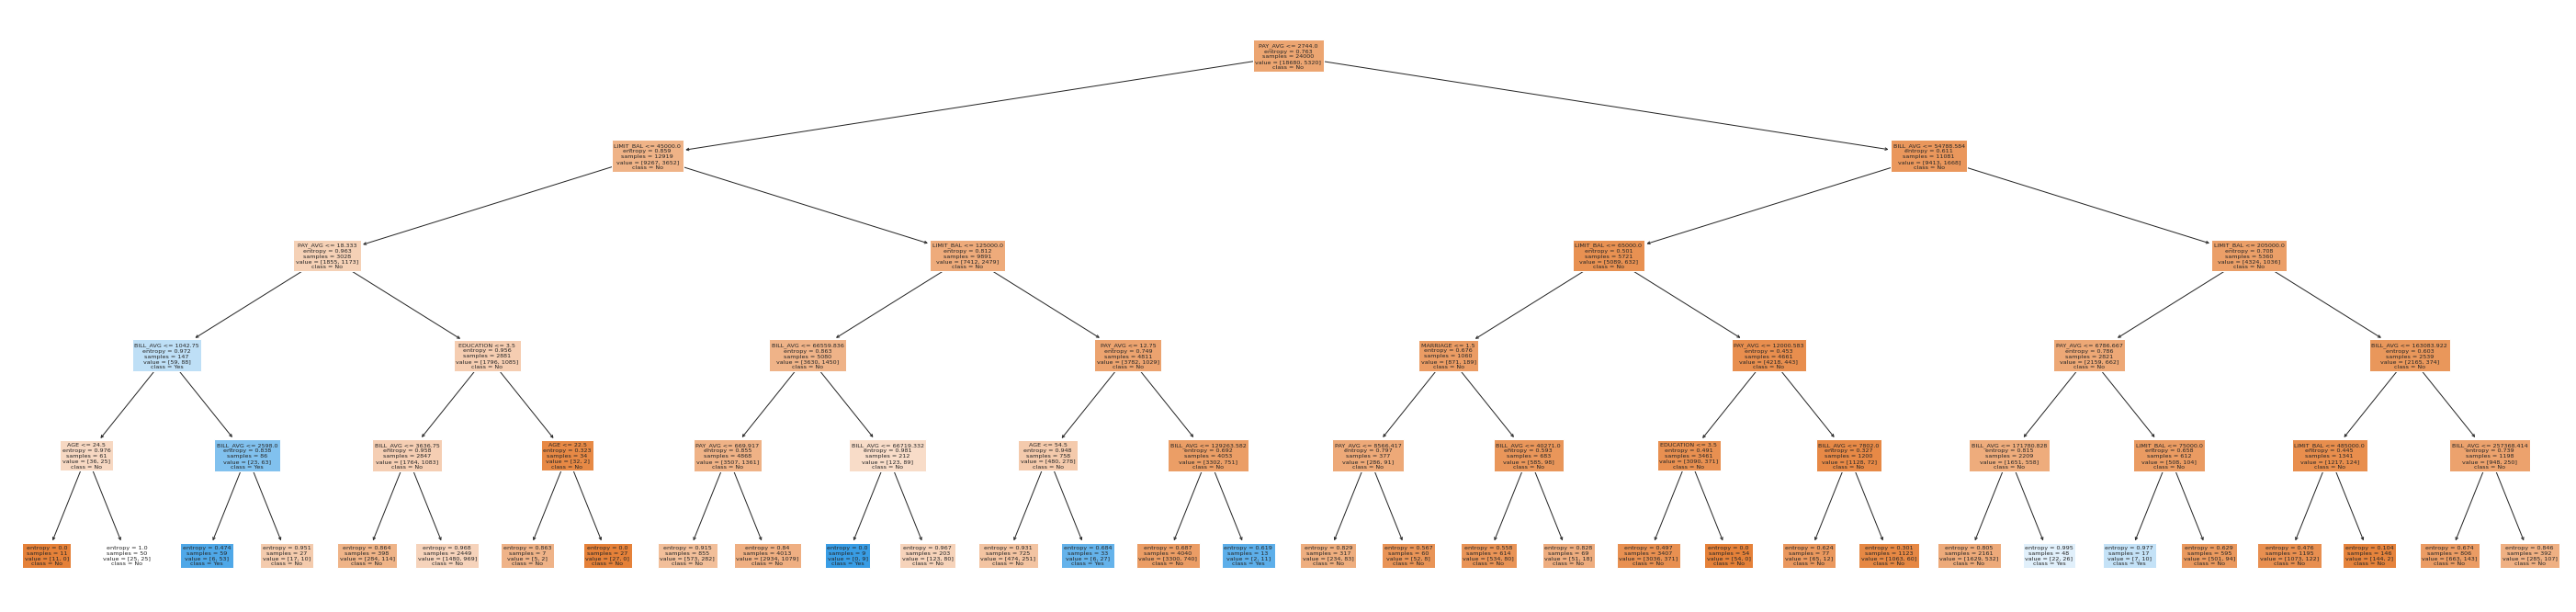

In [ ]:
text_representation = tree.export_text(dtc)
fig = plt.figure(figsize=(50,12))
tree.plot_tree(dtc, 
                   feature_names=X_train.columns,  
                   class_names=["No","Yes"],
                   filled=True)
fig.savefig("decistion_tree.png",bbox_inches = 'tight')


with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

Below we are going to create now a random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(n_estimators = 20, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

Below we evaluate it again.

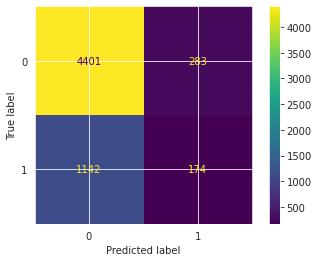

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4684
           1       0.38      0.13      0.20      1316

    accuracy                           0.76      6000
   macro avg       0.59      0.54      0.53      6000
weighted avg       0.70      0.76      0.71      6000

Accuracy: 0.7625
Precision: 0.38074398249452956
Recall: 0.13221884498480244
F1 Score: 0.19627749576988157
Cohens Kappa Score: 0.0938165859333202
Area Under Curve: 0.6307875026929934
Confusion Matrix:
 [[4401  283]
 [1142  174]]


In [ ]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Below we will model our date using K-means algorithm.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

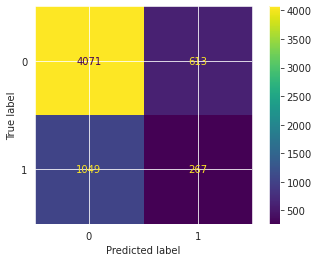

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4684
           1       0.30      0.20      0.24      1316

    accuracy                           0.72      6000
   macro avg       0.55      0.54      0.54      6000
weighted avg       0.69      0.72      0.70      6000

Accuracy: 0.723
Precision: 0.3034090909090909
Recall: 0.20288753799392098
F1 Score: 0.24316939890710385
Cohens Kappa Score: 0.08175442732121285
Area Under Curve: 0.5763570740722475
Confusion Matrix:
 [[4071  613]
 [1049  267]]


In [ ]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

# Model comparisson.

Now we will compare our models to check which one best fit our prediction model.

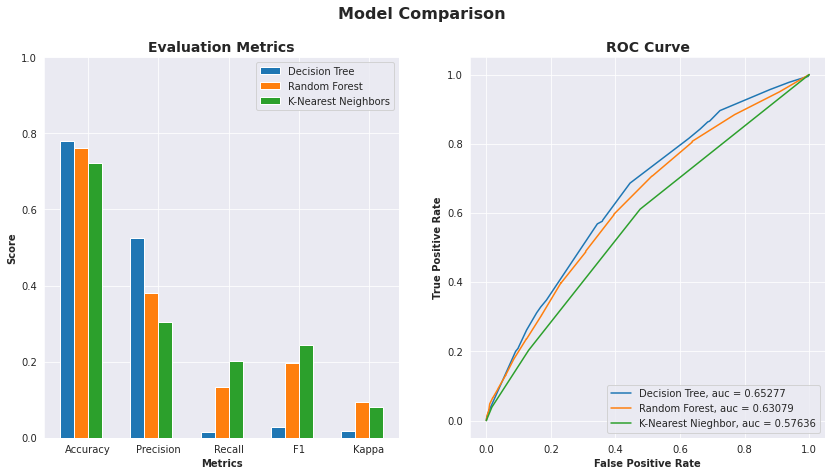

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r4 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Model Optimization.

Below we will optimize our model for accuracy and precision.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

# 1. n_estimators: The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
# 2. max_depth: The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
# 3. min_samples_split: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.
# 4. min_samples_leaf: The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.

param_grid = {
    'max_depth': [4, 6, 8],
    #'criterion': ["gini", "entropy"],
    'n_estimators': [50, 150, 200],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 4]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='f1',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150}

Now we will evaluate the optimized model.

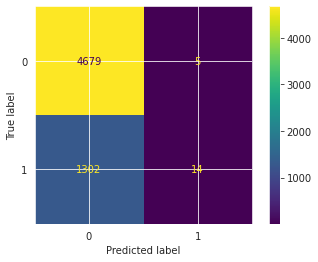

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4684
           1       0.74      0.01      0.02      1316

    accuracy                           0.78      6000
   macro avg       0.76      0.50      0.45      6000
weighted avg       0.77      0.78      0.69      6000

Accuracy: 0.7821666666666667
Precision: 0.7368421052631579
Recall: 0.010638297872340425
F1 Score: 0.02097378277153558
Cohens Kappa Score: 0.014823130475507984
Area Under Curve: 0.6752094045823718
Confusion Matrix:
 [[4679    5]
 [1302   14]]


In [ ]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Now we compare our models once again.

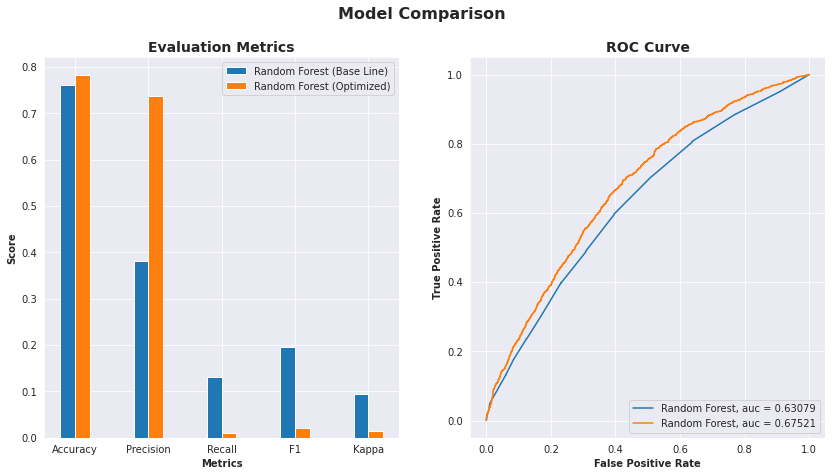

Change of 2.58% on accuracy.
Change of 93.53% on precision.
Change of -91.95% on recall.
Change of -89.31% on F1 score.
Change of -84.20% on Kappa score.
Change of 7.04% on AUC.


In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

# Prediction Section (Deployment).

In [ ]:
df_credit['loan_prediction'] = rf.predict(feature)
df_credit['loan_prediction'] = df_credit['loan_prediction'].apply(lambda x: 'yes' if x==0 else 'no')

# Save new dataframe into csv file
df_credit.to_csv('loan_prediction.csv', index=False)

df_credit.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AVG,PAY_AVG,PAYMENT,loan_prediction
0,10000,1,2,2,22,3793.500000,1204.500000,0,yes
1,10000,1,2,1,56,3808.666667,501.666667,1,no
2,10000,1,3,2,23,8689.333333,655.333333,0,yes
3,10000,1,2,2,27,9474.666667,911.666667,1,no
4,10000,1,2,2,24,2458.666667,275.000000,0,yes
5,10000,2,2,2,22,9878.333333,767.833333,0,yes
6,10000,1,2,2,46,6159.166667,627.666667,1,no
7,10000,1,2,2,33,8251.166667,1357.500000,0,yes
8,10000,2,3,2,22,4357.666667,506.000000,1,no
9,10000,1,2,2,22,8180.166667,1250.000000,1,no


With this we have finished our model is working properly and we can predict which individuals are more likely to pay their loans as is sopposed to be. Thank you very much! you may contact me for more help you can add me in linkedin or right here in git hub, to stay in touch. also you may send me an email if you want more personalized help. Have a great day!